In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras import Sequential
from keras.api.layers import Dense, Dropout
from keras.api.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.shape, test.shape

((23518, 190), (5880, 190))

In [3]:
y_train = train['actual']
X_train = train.drop(columns=['run', 'crossing_id', 'EPC', 'actual', 'xstat', 'xmoving', 'keep_out'])

y_test = test['actual']
X_test = test.drop(columns=['run', 'crossing_id', 'EPC', 'actual', 'xstat', 'xmoving', 'keep_out'])

In [4]:
X_train.shape, X_test.shape

((23518, 183), (5880, 183))

In [5]:
def binarize_label(input_label: str) -> int:
	return 1 if input_label == 'stationary' else 0

In [6]:
y_train = y_train.apply(binarize_label)

y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: actual, dtype: int64

In [7]:
y_test = y_test.apply(binarize_label)

y_test.head()

0    0
1    1
2    0
3    0
4    1
Name: actual, dtype: int64

In [8]:
y_train = to_categorical(y_train)
y_train.shape

(23518, 2)

In [9]:
y_test = to_categorical(y_test)
y_test.shape

(5880, 2)

In [10]:
model = Sequential()
model.add(Dense(64, input_shape=(183,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100


/Users/corentin/Desktop/Programming/Data Science/RFID-tags-detection/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.6158 - loss: 0.6613 - val_accuracy: 0.9342 - val_loss: 0.2933
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.9028 - loss: 0.2671 - val_accuracy: 0.9580 - val_loss: 0.1233
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.9443 - loss: 0.1706 - val_accuracy: 0.9646 - val_loss: 0.1007
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.9578 - loss: 0.1308 - val_accuracy: 0.9670 - val_loss: 0.0871
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9635 - loss: 0.1097 - val_accuracy: 0.9709 - val_loss: 0.0784
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9685 - loss: 0.1019 - val_accuracy: 0.9721 - val_loss: 0.0717
Epoch 7/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.9678 - loss: 0.0935 - val_accuracy: 0.9767 - val_loss: 0.0693
Epoch 8/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9721 - loss: 0.0852 - val_

In [11]:
y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred_labels))

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4014
           1       0.99      0.98      0.98      1866

    accuracy                           0.99      5880
   macro avg       0.99      0.99      0.99      5880
weighted avg       0.99      0.99      0.99      5880



In [12]:
print(f"{round(accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)*100, 2)}%")

98.98%


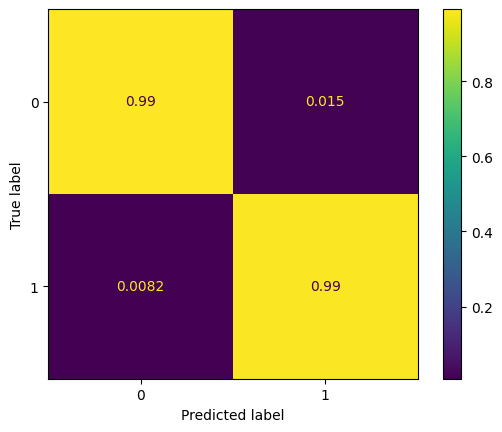

In [13]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

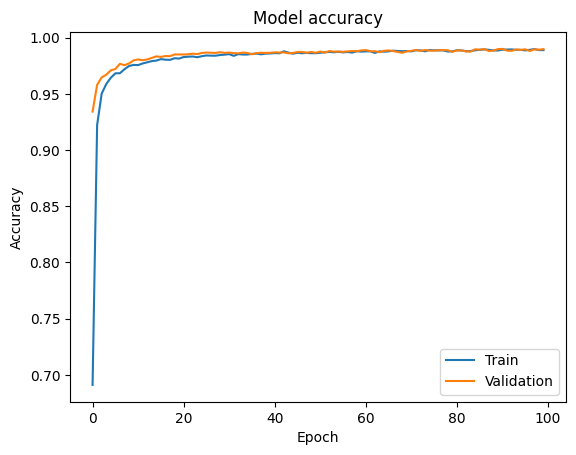

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

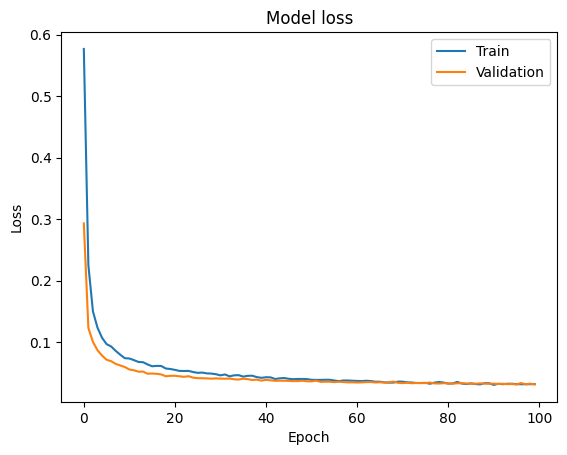

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Great accuracy, no over/underfitting.